# ML Pipeline

## 1) Data Ingestion
## 2) EDA
## 3) Preprocessing
## 4) Model
## 5) Evaluation

In [1]:
import pandas as pd


In [7]:
data=pd.read_csv("https://raw.githubusercontent.com/snehsuresh/gemstone-price-prediction/main/cubic_zirconia.csv")

In [8]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

In [9]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [10]:
data["color"].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [11]:
data.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
23568,23569,1.26,Ideal,G,SI1,59.6,57.0,7.08,7.04,4.21,6738
24756,24757,1.50,Premium,H,VS2,60.8,59.0,7.34,7.36,4.47,10291
18051,18052,1.00,Premium,D,SI2,60.3,58.0,6.48,6.45,3.90,4295
10730,10731,0.30,Premium,G,VS1,62.5,59.0,4.32,4.25,2.68,787
801,802,1.13,Ideal,I,VS1,61.6,54.0,6.72,6.74,4.15,5813
4155,4156,0.72,Ideal,E,SI1,62.2,58.0,5.72,5.75,3.57,3037
15221,15222,1.01,Good,H,SI1,60.6,61.0,6.35,6.39,3.86,4242
657,658,0.60,Ideal,D,VS2,61.5,55.0,5.42,5.45,3.34,2325
2394,2395,0.37,Ideal,F,VS2,61.1,57.0,4.67,4.63,2.84,957
10876,10877,0.52,Good,E,SI2,60.5,62.0,5.15,5.20,3.13,1199


In [12]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [13]:
data.size

296637

In [14]:
data.shape

(26967, 11)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [16]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [18]:
data.duplicated().sum()

0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [21]:
cat_columns=data.columns[data.dtypes=="object"] #Get categorical columns
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [24]:
num_columns=data.columns[data.dtypes!="object"]
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [30]:
for col in cat_columns:
    print(data[col].value_counts())
    print(f"here is the total count of categories:{len(data[col].value_counts())}")
    print("=======================")

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64
here is the total count of categories:5
color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64
here is the total count of categories:7
clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64
here is the total count of categories:8


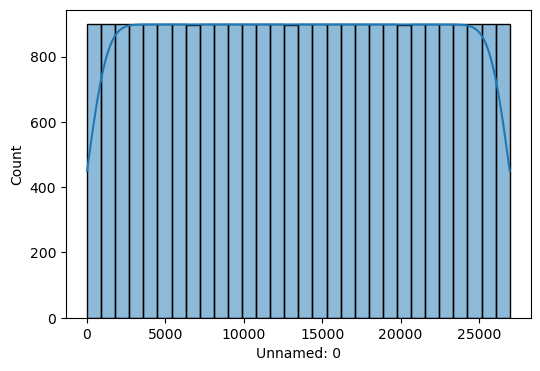

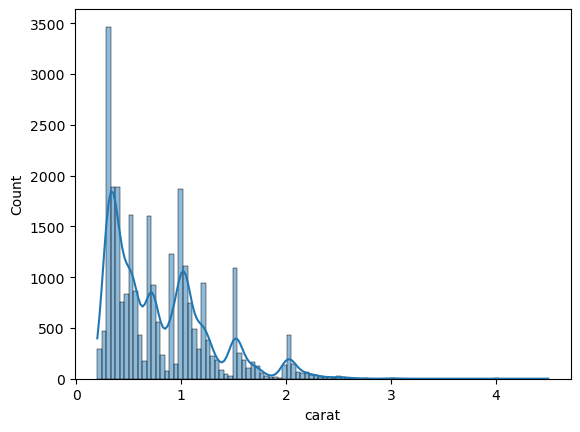

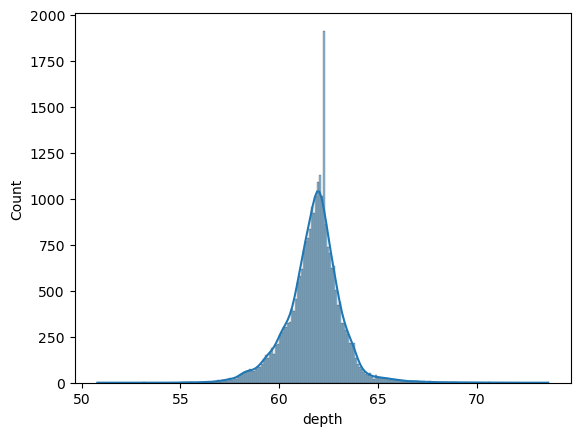

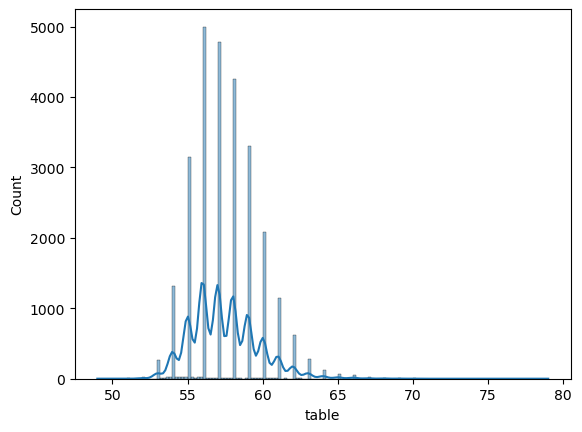

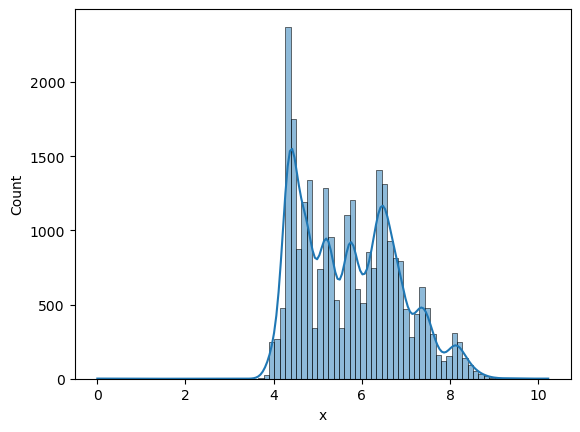

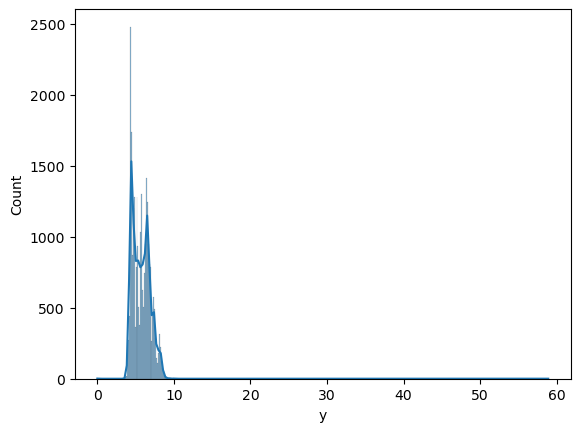

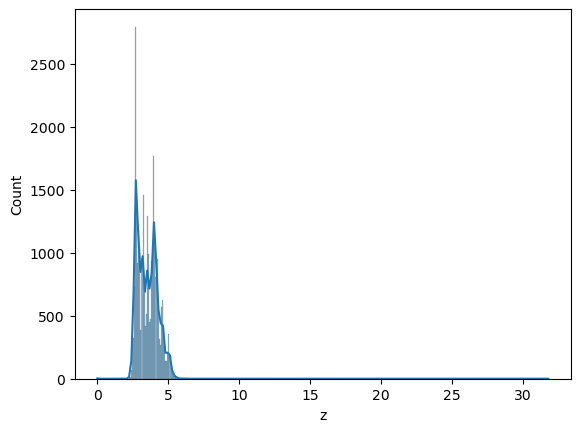

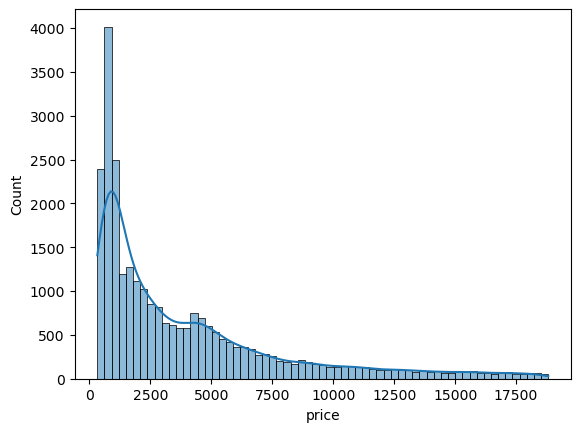

In [31]:
#Encoding the categories
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

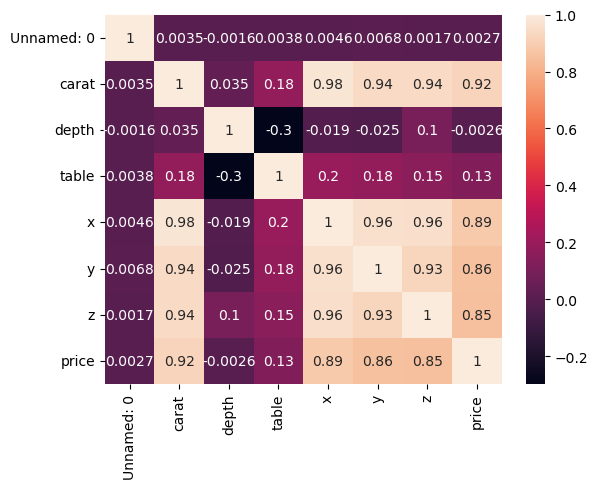

In [32]:
sns.heatmap(data[num_columns].corr(),annot=True)

In [ ]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [33]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [35]:
X=data.drop(labels=["price"],axis=1)
y=data["price"]

In [36]:
X.select_dtypes(include="object")

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [37]:
X.select_dtypes(exclude="object")

,Unnamed: 0,carat,depth,table,x,y,z
0,1,0.30,62.1,58.0,4.27,4.29,2.66
1,2,0.33,60.8,58.0,4.42,4.46,2.70
2,3,0.90,62.2,60.0,6.04,6.12,3.78
3,4,0.42,61.6,56.0,4.82,4.80,2.96
4,5,0.31,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...
26962,26963,1.11,62.3,58.0,6.61,6.52,4.09
26963,26964,0.33,61.9,55.0,4.44,4.42,2.74
26964,26965,0.51,61.7,58.0,5.12,5.15,3.17
26965,26966,0.27,61.8,56.0,4.19,4.20,2.60


In [38]:
cat_cols=X.select_dtypes(include="object").columns

num_cols=X.select_dtypes(exclude="object").columns

In [43]:
X.select_dtypes(include="object").head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


## all Preprocessing steps related to numerical or categorical variable inserted to Pipeline


num_pipeline = Pipeline()

In [ ]:
cat_pipeline = Pipeline()